### Simple AB Test

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt

### Step 1: Visualize Data

In [2]:
# Let's assume we have 1000 users for control and 1000 for treatment
n_control = 1000
n_treatment = 1000

# Simulate conversion rates
conversion_rate_control = 0.1
conversion_rate_treatment = 0.12  # we expect a 2% increase

# Generate data
control = np.random.binomial(1, conversion_rate_control, n_control)
treatment = np.random.binomial(1, conversion_rate_treatment, n_treatment)

# Create DataFrame
df = pd.DataFrame({
    'group': ['control']*n_control + ['treatment']*n_treatment,
    'converted': np.concatenate([control, treatment])
})

In [3]:
df.head()

,group,converted
0,control,0
1,control,0
2,control,0
3,control,0
4,control,0


In [4]:
df.groupby('group').describe()

converted                                          
              count   mean       std  min  25%  50%  75%  max
group                                                        
control      1000.0  0.089  0.284886  0.0  0.0  0.0  0.0  1.0
treatment    1000.0  0.126  0.332015  0.0  0.0  0.0  0.0  1.0

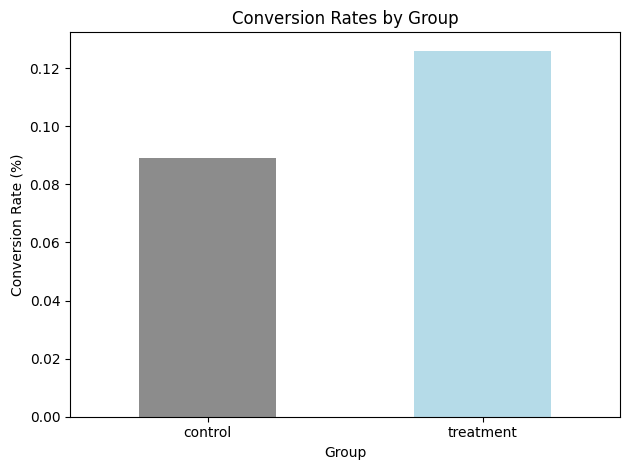

In [5]:
# Calculate conversion rates
conversion_rates = df.groupby('group')['converted'].mean()

# Plotting
conversion_rates.plot(kind='bar', color=['gray', 'lightblue'], alpha=0.9)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Step 2: Calculate Sample Size

In [6]:
def calculate_sample_size(p1, p2, alpha=0.05, power=0.8):
    p = (p1 + p2) / 2
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(power)
    sample_size = (2 * p * (1 - p) * (z_alpha + z_beta)**2) / (p1 - p2)**2
    return math.ceil(sample_size)

# Assuming a baseline conversion rate of 10% and MDE of 2%
baseline_rate = 0.1
mde = 0.02
alpha = 0.05
power = 0.8

required_sample_size = calculate_sample_size(baseline_rate, baseline_rate + mde, alpha, power)
print(f"Required sample size per group: {required_sample_size}")

Required sample size per group: 3843


### Step 3: Run A/B Test

In [7]:
# Calculate conversion rates
conversion_control = df[df['group'] == 'control']['converted'].mean()
conversion_treatment = df[df['group'] == 'treatment']['converted'].mean()

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(df[df['group'] == 'control']['converted'],
                                  df[df['group'] == 'treatment']['converted'])

print(f"Control conversion rate: {conversion_control:.4f}")
print(f"Treatment conversion rate: {conversion_treatment:.4f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Control conversion rate: 0.0890
Treatment conversion rate: 0.1260
T-statistic: -2.6745, P-value: 0.0075


### Step 4: Check for Statistical Significance

In [8]:
if p_value < alpha:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")
print("stat-sig threshold: ", alpha)
print("P-value: ", p_value)

The result is statistically significant.
stat-sig threshold:  0.05
P-value:  0.007545841459629015


### Step 5: Check for Practical Significance

In [9]:
# Define the practical significance threshold
practical_threshold = mde

# Calculate the observed effect size
observed_effect = conversion_treatment - conversion_control
print(f"Observed effect size: {observed_effect:.4f}")

if observed_effect >= practical_threshold:
    print("The result is practically significant.")
else:
    print("The result is not practically significant.")

Observed effect size: 0.0370
The result is practically significant.
